In [1]:
import numpy as np

from sklearn import decomposition, metrics
from umap import UMAP

from news_vec.encoder import read_preds

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [4]:
df, embeds = read_preds('thesis/data/ab/cnn-fox/')

100%|██████████| 54/54 [00:01<00:00, 37.75it/s]


In [5]:
df['p_true'] = df.apply(lambda r: r[f'p_{r.domain}'], axis=1)
df['tip'] = df[['domain', 'title']].apply(lambda x: f'{x[0]} - {x[1]}', axis=1)

In [6]:
df.groupby('domain').size()

domain
cnn.com        26860
foxnews.com    26860
dtype: int64

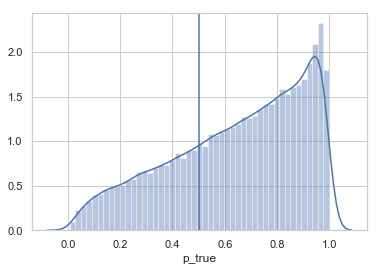

In [8]:
sns.distplot(df.p_true)
plt.axvline(0.5)

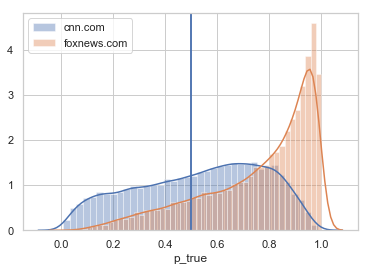

In [9]:
for d in df.domain.unique():
    sns.distplot(df[df.domain==d].p_true, label=d)
    plt.axvline(0.5)
    plt.legend()

In [16]:
pdf = df[(df.split=='test')&(df.domain=='foxnews.com')].copy()
pdf['log_imp'] = np.log(pdf.impressions)

<Figure size 720x360 with 0 Axes>

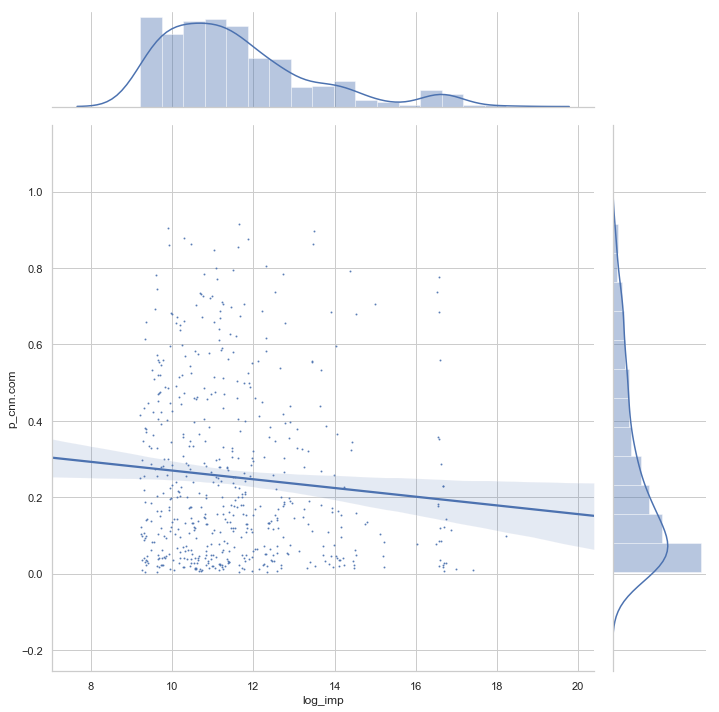

In [19]:
plt.figure(figsize=(10,5))
sns.jointplot(x='log_imp', y='p_cnn.com', data=pdf, height=10, kind='reg', scatter_kws=dict(s=1))